<a href="https://colab.research.google.com/github/hossein20s/tutorial/blob/master/synthetic_mass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
print(tf.__version__)

1.13.1


In [0]:
import sys
sys.path.append('/content/gdrive/My Drive/python-lib')

from google.colab import drive
drive.mount('/content/gdrive')

persist_path = "gdrive/My Drive/models/synthetic-mass/"
data_path = "gdrive/My Drive/data/synthetic-mass/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd

patients = pd.read_csv(data_path + 'patients.csv', parse_dates=['BIRTHDATE', 'DEATHDATE'], infer_datetime_format=True)

print(patients.shape)
print('-'*80)   
print(patients.info())
print('-'*80)   
print(patients.dtypes)
print('-'*80)   
print(patients.describe())
print('-'*80)   
print(patients.head())


(1462, 17)
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 17 columns):
ID            1462 non-null object
BIRTHDATE     1462 non-null datetime64[ns]
DEATHDATE     457 non-null datetime64[ns]
SSN           1462 non-null object
DRIVERS       1196 non-null object
PASSPORT      1123 non-null object
PREFIX        1166 non-null object
FIRST         1462 non-null object
LAST          1462 non-null object
SUFFIX        45 non-null object
MAIDEN        403 non-null object
MARITAL       1033 non-null object
RACE          1462 non-null object
ETHNICITY     1462 non-null object
GENDER        1462 non-null object
BIRTHPLACE    1462 non-null object
ADDRESS       1462 non-null object
dtypes: datetime64[ns](2), object(15)
memory usage: 194.2+ KB
None
--------------------------------------------------------------------------------
ID                    object
BIRTHDATE     dat

In [0]:
procedures = pd.read_csv(data_path + 'procedures.csv', parse_dates=['DATE'] )

print(procedures.shape)
print('-'*80)   
print(procedures.iloc[0])


(10184, 7)
--------------------------------------------------------------------------------
DATE                                             2013-02-09 00:00:00
PATIENT                         71949668-1c2e-43ae-ab0a-64654608defb
ENCOUNTER                       6f2e3935-b203-493e-a9c0-f23e847b9798
CODE                                                        23426006
DESCRIPTION          Measurement of respiratory function (procedure)
REASONCODE                                                1.0509e+07
REASONDESCRIPTION                        Acute bronchitis (disorder)
Name: 0, dtype: object


In [0]:
encounters = pd.read_csv(data_path + 'encounters.csv', parse_dates=['DATE'])

print(encounters.shape)
print('-'*80)   
print(encounters.iloc[0])


(20524, 7)
--------------------------------------------------------------------------------
ID                   5114a5b4-64b8-47b2-82a6-0ce24aae0943
DATE                                  2008-03-11 00:00:00
PATIENT              71949668-1c2e-43ae-ab0a-64654608defb
CODE                                            185349003
DESCRIPTION                          Outpatient Encounter
REASONCODE                                            NaN
REASONDESCRIPTION                                     NaN
Name: 0, dtype: object


In [0]:
conditions = pd.read_csv(data_path + 'conditions.csv', )

print(conditions.shape)
print('-'*80)   
print(conditions.iloc[0])


(7040, 6)
--------------------------------------------------------------------------------
START                                    2009-01-08
STOP                                     2009-01-21
PATIENT        71949668-1c2e-43ae-ab0a-64654608defb
ENCOUNTER      4d451e22-a354-40c9-8b33-b6126158666d
CODE                                       10509002
DESCRIPTION             Acute bronchitis (disorder)
Name: 0, dtype: object


In [0]:
patient_procedures = patients.merge(procedures, left_on='ID', right_on='PATIENT')
print(patient_procedures.shape)
print('-'*80)   

selected_patient_procedures = patient_procedures[['ID', 'BIRTHDATE', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ENCOUNTER', 'CODE', 'DESCRIPTION', 'REASONCODE', 'REASONDESCRIPTION']]
print(selected_patient_procedures.iloc[0])
print('-'*80)  
print(selected_patient_procedures.groupby(['GENDER']).size())

(10184, 24)
--------------------------------------------------------------------------------
ID                              71949668-1c2e-43ae-ab0a-64654608defb
BIRTHDATE                                        1988-05-28 00:00:00
MARITAL                                                            M
RACE                                                           white
ETHNICITY                                                      irish
GENDER                                                             F
BIRTHPLACE                                           Lexington MA US
ENCOUNTER                       6f2e3935-b203-493e-a9c0-f23e847b9798
CODE                                                        23426006
DESCRIPTION          Measurement of respiratory function (procedure)
REASONCODE                                                1.0509e+07
REASONDESCRIPTION                        Acute bronchitis (disorder)
Name: 0, dtype: object
--------------------------------------------------------

In [0]:
heart_conditions = conditions.iloc[conditions[conditions['DESCRIPTION'].str.contains("Heart")].index.tolist()]
X = patients.merge(heart_conditions, left_on='ID', right_on='PATIENT')
print(X.shape)
print('-'*80)   

patient_heart_conditions = X[['ID', 'BIRTHDATE', 'MARITAL', 'RACE', 'ETHNICITY', 'GENDER', 'BIRTHPLACE', 'ENCOUNTER', 'CODE', 'DESCRIPTION']]
print(patient_heart_conditions.iloc[0])
print('-'*80)   
print(patient_heart_conditions.groupby(['GENDER']).size())

(98, 23)
--------------------------------------------------------------------------------
ID             81979c08-df99-4792-b608-65fcf28f4019
BIRTHDATE                       1968-07-11 00:00:00
MARITAL                                           M
RACE                                          white
ETHNICITY                                  american
GENDER                                            M
BIRTHPLACE                           Brockton MA US
ENCOUNTER      9a1ce976-5abc-4df4-9743-31d70c6bb571
CODE                                       53741008
DESCRIPTION                  Coronary Heart Disease
Name: 0, dtype: object
--------------------------------------------------------------------------------
GENDER
F    23
M    75
dtype: int64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


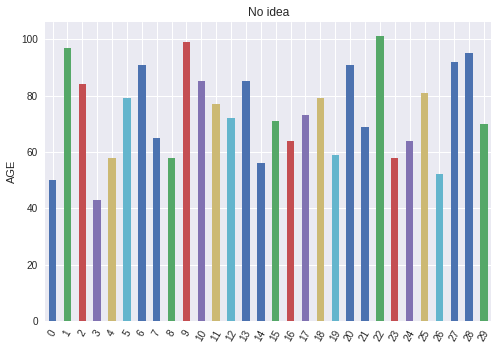

(66, 11)

In [0]:
import datetime as DT
import matplotlib.pyplot as plt # this is used for the plot the graph 


old = 70

now = pd.Timestamp(DT.datetime.now())
patient_heart_conditions['AGE'] = (now - patient_heart_conditions['BIRTHDATE']).astype('<m8[Y]') 
XY = patient_heart_conditions
# .sort_values(by=['AGE'], ascending=False)
XX = XY.iloc[0:30,:]

#print(XX['AGE'])

XX['AGE'].plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('AGE')
plt.title('Patients')
plt.show()


fifty_years = pd.to_timedelta(str(old * 365.25) + ' days')
old_patient_heart_conditionss = patient_heart_conditionss.iloc[patient_heart_conditionss[patient_heart_conditionss['AGE'] > fifty_years ].index.tolist()]
old_patient_heart_conditionss.shape


In [0]:
print(selected_patient_procedures.groupby(['BIRTHPLACE']).count().sort_values(by=['REASONCODE']))

                        ID  BIRTHDATE  MARITAL  RACE  ETHNICITY  GENDER  \
BIRTHPLACE                                                                
Millville MA US          3          3        0     3          3       3   
Middleborough MA US     22         22        8    22         22      22   
Paxton MA US             5          5        0     5          5       5   
Berkley MA US            9          9        6     9          9       9   
Warwick MA US           17         17        0    17         17      17   
Colrain MA US            3          3        3     3          3       3   
Charlemont MA US         8          8        8     8          8       8   
Franklin Town MA US     11         11       11    11         11      11   
Hadley MA US             1          1        1     1          1       1   
Westborough MA US        5          5        0     5          5       5   
Boylston MA US           6          6        0     6          6       6   
Stoughton MA US         1

In [0]:

# Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

In [0]:
isnull = []

for j in range(0,17):
  print(patients.iloc[0, j])

71949668-1c2e-43ae-ab0a-64654608defb
1988-05-28
nan
999-60-7250
S99965240
X22244130X
Mrs.
Elly802
Koss811
nan
Upton199
M
white
irish
F
Lexington MA US
609 Lizeth Streets Bolton MA 01740 US
